#### A1:Proposal of Question

Can we leverage PCA(principle component analysis) to extract features of our data into signals that retain the trends and patterns needed for retaining customers. 

#### A2:Defined Goal
    

One goal of the PCA is to identify and isolate principle features or compenents that can be used to support decision making regarding customer retention.


# Part II: Method Justification

#### B1:Explanation of PCA

PCA(principle component analysis)

According to builtin.com there are 5 simple steps to a PCA workflow they are
    
    1) Standardize the range of continuous initial variables
    
    2) Compute the covariance matrix to identify correlations
    
    3) Compute the eigenvectors and eigenvalues of the covariance matrix to identify the principal components
    
    4) Create a feature vector to decide which principal components to keep
    
    5) Recast the data along the principal components axes
    https://builtin.com/data-science/step-step-explanation-principal-component-analysis


The expected outcome will be to identify which variables are significantly correlated with each component. 

#### B2:PCA Assumption

There are a few assumptions with PCA but the big one is that there is a correlation between features. If there is no correlation there will be no way to discover the principle components.

# Part III: Data Preparation

## C.  Perform data preparation for the chosen dataset by doing the following:

### 1.  Identify the continuous dataset variables that you will need in order to answer the PCA question proposed in part A1.

### 2.  Standardize the continuous dataset variables identified in part C1. Include a copy of the cleaned dataset.

#### C1:Continuous Dataset Variables
The submission accurately identifies the continuous dataset variables needed to answer the PCA question from part A1.


    - Population 
    - Children 
    - Age 
    - Income
    - Outage_sec_perweek
    - Email
    - Contacts
    - Yearly_equip_failure
    - Tenure Continuous
    - MonthlyCharge
    - Bandwidth_GB_Year


#### C2:Standardization of Dataset Variables

Because this is a repeat of task 1 I have left out documentation and eda for cleaning steps. 

In [1]:
#### LOAD LIBRARIES
##### system
import sys, os
from time import time

##### Data
import pandas as pd
import numpy as np


###### stats
import scipy.stats as stats
import math
import statsmodels.api as sm

##### Visualization
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.max_open_warning': 0})

#### PreProcessing Test train split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate, train_test_split, StratifiedShuffleSplit, cross_val_score
from sklearn.feature_selection import SelectKBest, SelectPercentile, f_classif
from sklearn.pipeline import Pipeline, make_pipeline, FeatureUnion


#### Models
from sklearn.cluster import KMeans


#### Evaluation of Models
from sklearn.metrics import accuracy_score, precision_score, f1_score
from sklearn.metrics import mean_squared_error as MSE

In [2]:
file = pd.read_csv('C://Users//msmorris//Desktop//CHURN_VIZ//churn_clean.csv')
file.head()

,CaseOrder,Customer_id,Interaction,UID,input_date,City,State,County,Zip,Lat,...,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,e885b299883d4f9fb18e39c75155d990,6/29/2021,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,...,172.455519,904.536110,5,5,5,3,4,4,3,4
1,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,f2de8bef964785f41a2959829830fb8a,2/10/2020,West Branch,MI,Ogemaw,48661,44.32893,...,242.632554,800.982766,3,4,3,3,4,3,4,4
2,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,f1784cfa9f6d92ae816197eb175d3c71,9/6/2021,Yamhill,OR,Yamhill,97148,45.35589,...,159.947583,2054.706961,4,4,2,4,4,3,3,3
3,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,dc8a365077241bb5cd5ccd305136b05e,5/30/2021,Del Mar,CA,San Diego,92014,32.96687,...,119.956840,2164.579412,4,4,4,2,5,4,3,3
4,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,aabb64a116e83fdc4befc1fbab1663f9,7/5/2021,Needville,TX,Fort Bend,77461,29.38012,...,149.948316,271.493436,4,4,4,3,4,4,4,5


In [3]:
# Drop unneeded fields
file = file.drop(['UID','TimeZone','input_date','State','Job','CaseOrder', 'Customer_id', 
                  'Interaction', 'Lat', 'Lng','County', 'Zip', 'Area', 'City', 'Population'], axis = 1)

In [4]:
## Assumption is the data is already cleaned per course 207. Validating there are no blank records
for col in file:
    blanks = []
    if file.columns.isna().any()== True:
        blanks = col
print(blanks)

[]


In [5]:
# For effiecency will still make assumption that data is cleaned but perform removal of blank spaces and drop duplicates
# Remove blank spaces
file = file.replace(" ", "")

In [6]:
# Drop Duplicates
file = file.drop_duplicates()

In [7]:
#Convert INF to INT
# Convert duration to integer
for col in file:
    if file[col].dtype == 'float':
        file[col] = file[col].astype(int)

In [8]:
# rename item fields
col = file.columns.values
item_desc= (['Timely_response', 'Timely_fixes', 'Timely_replacements', 
            'Reliability', 'Options','Respectful_response', 
            'Courteous_exchange', 'Evidence_of_active_listening'])
col[-8:]= item_desc
file.columns = col

In [9]:
file_null = file.isnull().any()
print(file_null)

Children                        False
Age                             False
Income                          False
Marital                         False
Gender                          False
Churn                           False
Outage_sec_perweek              False
Email                           False
Contacts                        False
Yearly_equip_failure            False
Techie                          False
Contract                        False
Port_modem                      False
Tablet                          False
InternetService                 False
Phone                           False
Multiple                        False
OnlineSecurity                  False
OnlineBackup                    False
DeviceProtection                False
TechSupport                     False
StreamingTV                     False
StreamingMovies                 False
PaperlessBilling                False
PaymentMethod                   False
Tenure                          False
MonthlyCharg

In [10]:
df = file[['Churn', 'Children', 'Age', 'Income', 'Outage_sec_perweek', 'Email', 'Contacts', 'Yearly_equip_failure', 'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year']]

In [11]:
import warnings
warnings.simplefilter(action="ignore")
df['churn_dum'] = [1 if i == 'Yes' else 0 for i in df['Churn']]
df = df.drop('Churn', axis = 1)
df

,Children,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge,Bandwidth_GB_Year,churn_dum
0,0,68,28561,7,10,0,1,6,172,904,0
1,1,27,21704,11,12,0,1,1,242,800,1
2,4,50,9609,10,9,0,1,15,159,2054,0
3,1,48,18925,14,15,2,0,17,119,2164,0
4,0,83,40074,8,16,2,1,1,149,271,1
...,...,...,...,...,...,...,...,...,...,...,...
9995,3,23,55723,9,12,2,0,68,159,6511,0
9996,4,48,34129,6,15,2,0,61,207,5695,0
9997,1,48,45983,6,10,0,0,47,169,4159,0
9998,1,39,16667,12,14,1,0,71,252,6468,0


In [12]:
# Defining X and y
# Set X as data and y as Target
X = df.drop('churn_dum',axis=1)
y = df['churn_dum']

In [13]:
#Standardize Num fields

# standardize using std scale
X = (X - X.mean())/X.std()

In [14]:
X

,Children,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge,Bandwidth_GB_Year
0,-0.972289,0.720889,-0.398775,-0.836091,-0.666248,-1.005801,0.946611,-1.059887,-0.000297,-1.138448
1,-0.506567,-1.259894,-0.641932,0.500746,-0.005288,-1.005801,0.946611,-1.248976,1.626413,-1.186039
2,0.890602,-0.148723,-1.070834,0.166536,-0.996729,-1.005801,0.946611,-0.719528,-0.302401,-0.612202
3,-0.506567,-0.245347,-0.740478,1.503373,0.986153,1.017537,-0.625832,-0.643892,-1.231950,-0.561866
4,-0.972289,1.445566,0.009488,-0.501882,1.316634,1.017537,0.946611,-1.248976,-0.534788,-1.428113
...,...,...,...,...,...,...,...,...,...,...
9995,0.424879,-1.453141,0.564419,-0.167673,-0.005288,1.017537,-0.625832,1.284812,-0.302401,1.427345
9996,0.890602,-0.245347,-0.201328,-1.170300,0.986153,1.017537,-0.625832,1.020088,0.813058,1.053939
9997,-0.506567,-0.245347,0.219028,-1.170300,-0.666248,-1.005801,-0.625832,0.490640,-0.070014,0.351057
9998,-0.506567,-0.680153,-0.820549,0.834955,0.655673,0.005868,-0.625832,1.398265,1.858800,1.407668


# Part IV: Analysis


### 1.  Determine the matrix of all the principal components.

### 2.  Identify the total number of principal components using the elbow rule or the Kaiser criterion. Include a screenshot of the scree plot.

### 3.  Identify the variance of each of the principal components identified in part D2.

### 4.  Identify the total variance captured by the principal components identified in part D2.

### 5.  Summarize the results of your data analysis.

#### D1:Principal Components

In [15]:
from sklearn.decomposition import PCA
pca = PCA(n_components = X.shape[1])
pca.fit_transform(X)

array([[-1.54594598,  0.14498445,  1.55362654, ..., -0.37461978,
         0.2648113 , -0.01893745],
       [-1.64998174, -0.12860662, -0.83807862, ..., -0.59382926,
         1.41339157, -0.0475476 ],
       [-0.91028439, -1.10770922,  0.24721662, ...,  0.43340612,
        -0.34030671,  0.06804904],
       ...,
       [ 0.57533122, -0.59192773,  0.71067165, ..., -0.27911217,
         0.09064279, -0.08905481],
       [ 2.02556871,  1.09154558, -1.82332919, ..., -0.18519842,
         0.72155109, -0.07956899],
       [ 1.55661371,  0.66104924, -2.19029607, ..., -0.45371489,
         1.18121284, -0.03812994]])

In [16]:
feat = pd.DataFrame(pca.components_.T,
                    columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 
                             'PC10'],
                    index=X.columns)
feat

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
Children,0.014189,-0.560980,-0.280956,0.156583,0.025352,-0.039215,0.290353,0.622369,-0.327648,-0.021536
Age,0.001817,0.483957,0.414680,-0.104858,-0.152429,0.111261,0.400722,0.160820,-0.600223,0.022483
Income,0.004240,-0.223004,0.273304,0.163174,0.789092,0.202998,0.287835,-0.311139,-0.073484,-0.001050
Outage_sec_perweek,0.006840,0.203770,-0.466719,0.602960,-0.044484,-0.227520,0.002986,-0.403618,-0.400478,0.000277
Email,-0.020840,0.107889,-0.454969,-0.437466,0.003108,-0.145192,0.688448,-0.209726,0.224758,0.000182
Contacts,0.004197,0.461646,-0.000183,0.145506,0.454471,-0.533741,-0.029964,0.465975,0.237147,-0.000939
Yearly_equip_failure,0.017687,-0.146131,0.416846,0.509738,-0.380003,-0.195392,0.431840,-0.051504,0.415959,0.000025
Tenure,0.705419,0.002351,0.019075,-0.041665,-0.003820,-0.040041,-0.003991,-0.029798,-0.019029,-0.705262
MonthlyCharge,0.040355,0.337123,-0.273989,0.316262,0.021968,0.739838,0.104395,0.249843,0.293884,-0.045806
Bandwidth_GB_Year,0.706909,-0.008114,-0.019784,-0.012678,0.005040,0.002984,-0.000922,0.000678,0.009458,0.706779


#### D2:Identification of Total Number of Components

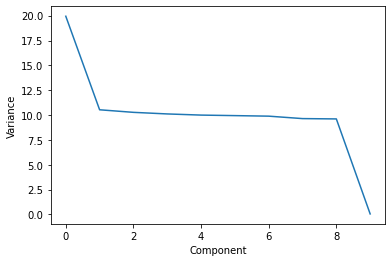

In [17]:
plt.plot(range(0, pca.n_components_), pca.explained_variance_ratio_*100)
plt.xlabel('Component')
plt.ylabel('Variance')
plt.show()

In [18]:
ev = [i for i in pca.explained_variance_ if i > 1]
ev

[1.994070315544598, 1.0531049118970315, 1.027303952939009, 1.0113147535138272]

reviewing the elbow it would appear the elbow bends right at 1 and slopes down to 8 with another drop at 8. 
The ev represents the eiganvalue and appears we should keep only 4.

#### D3:Total Variance of Components
The submission accurately identifies the variance of each of the principal components identified in part D2.

In [19]:
elbow = [i * 100 for i in list(pca.explained_variance_ratio_)][0:3]
df_elbow = (range(1,4), elbow)
df_elbow 

(range(1, 4), [19.94070315544527, 10.53104911896994, 10.273039529389722])

In [20]:
eigen = [i * 100 for i in list(pca.explained_variance_ratio_)][0:7]
df_eigen = (range(1,8), eigen)
df_eigen 

(range(1, 8),
 [19.94070315544527,
  10.53104911896994,
  10.273039529389722,
  10.11314753513791,
  9.996744834961609,
  9.94419562591669,
  9.88979965035419])

#### D4:Total Variance Captured by Components

In [22]:
tot_elbow = sum(map(sum, df_elbow))
tot_eigen = sum(map(sum, df_eigen))
print('total elbow : ', tot_elbow)
print('total eigen : ', tot_eigen)

total elbow :  46.74479180380493
total eigen :  108.68867945017533


#### D5:Summary of Data Analysis

Reviewing output of elbow and eigan we are given recommendations on what should be removed and or kept. From the elbow rule we would be keeping 3 compoonents as indicated in output 19 and a variance on the elbow shows 47%. Using the eigen approach allows for 7 components per output 20 but has double the variance at 108%.

By choosing the elbow recommendation there would be a loss of data with a stronger significance or we can have more data with less significance before making our predictions. 
My initial recommendation is to review less data that has a higher chance of better predictions.

Zakaria, Jaadie. “A Step-by-Step Explanation of Principal Component Analysis (PCA).” builtin.com, Day Month Year, https://builtin.com/data-science/step-step-explanation-principal-component-analysis.